## Linear & Generalized Linear Models
## 1. Logistic Regression

In [32]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

# Display first 5 rows
Dataset_Train.head()
Dataset_Test.head()


,age,gender,height_cm,weight_kg,activity_group,duration_minutes,intensity,calories_burned,daily_steps,avg_heart_rate,...,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,fitness_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,bmi
0,59,F,161.3,60.16,"High-Impact Cardio, Sport-Based Cardio, Strength",67.550893,"Medium, Low",14.823214,8537.102679,118.308036,...,106.6,69.1,11.35,9.199107,7.116518,4,2.483482,Never,healthy,23.122729
1,61,F,163.7,50.55,"High-Impact Cardio, Recreational, Sport-Based ...",70.856332,"Medium, Low",11.834498,8504.401747,117.139738,...,122.5,70.2,10.41,9.185109,6.997817,5,2.464629,Current,Diabetes,18.863566
2,21,M,178.4,74.84,"Strength, High-Impact Cardio, Low-Impact Cardio",70.175217,"Medium, Low",21.477391,8560.817391,146.982609,...,114.8,91.2,15.72,9.153652,7.052609,5,2.481739,Never,healthy,23.514951
3,50,M,172.9,60.69,"Sport-Based Cardio, Strength, Recreational",78.554065,"Medium, Low",17.593496,8596.597561,124.369919,...,103.1,83.4,14.09,10.280772,7.045528,5,2.483333,Former,healthy,20.301454
4,63,F,161.8,51.87,"Sport-Based Cardio, High-Impact Cardio, Low-Im...",78.097727,"Medium, Low",15.026364,8693.331818,116.650000,...,135.1,73.3,12.66,9.228682,7.060455,5,2.485455,Never,Asthma,19.813409


In [33]:
# Remove rows where Gender == 'Other'
Dataset_Train = Dataset_Train[Dataset_Train['gender'] != 'Other']
Dataset_Test = Dataset_Test[Dataset_Test['gender'] != 'Other']

# Optional: Reset index after removal
Dataset_Train = Dataset_Train.reset_index(drop=True)
Dataset_Test = Dataset_Test.reset_index(drop=True)

print("✅ 'Other' category removed from Gender column.")
print("Remaining categories in training set:", Dataset_Train['gender'].unique())
print("Remaining categories in test set:", Dataset_Test['gender'].unique())


✅ 'Other' category removed from Gender column.
Remaining categories in training set: ['F' 'M']
Remaining categories in test set: ['F' 'M']


In [34]:
Dataset_Train['activity_group'] = (
    Dataset_Train['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)
Dataset_Test['activity_group'] = (
    Dataset_Test['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)

In [35]:
Dataset_Test['activity_group'].nunique()

19

In [36]:
Dataset_Train['activity_group'].nunique()

20

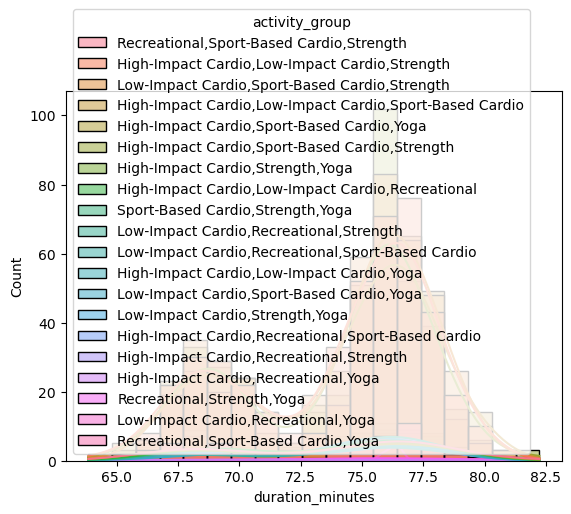

In [37]:
sns.histplot(data=Dataset_Train, x='duration_minutes', hue='activity_group', kde=True)
plt.show()


In [38]:
# Convert the specified columns to categorical
Dataset_Train['stress_level'] = Dataset_Train['stress_level'].astype('category')

# Verify the changes
print(Dataset_Train[['stress_level']].dtypes)
# Convert the specified columns to categorical
Dataset_Test['stress_level'] = Dataset_Test['stress_level'].astype('category')

# Verify the changes
print(Dataset_Test[['stress_level']].dtypes)

stress_level    category
dtype: object
stress_level    category
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

✅ Train Accuracy: 0.7133730834752982
✅ Test Accuracy: 0.7125850340136054

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        55
Hypertension       0.00      0.00      0.00        85
     healthy       0.71      1.00      0.83       419

    accuracy                           0.71       588
   macro avg       0.18      0.25      0.21       588
weighted avg       0.51      0.71      0.59       588



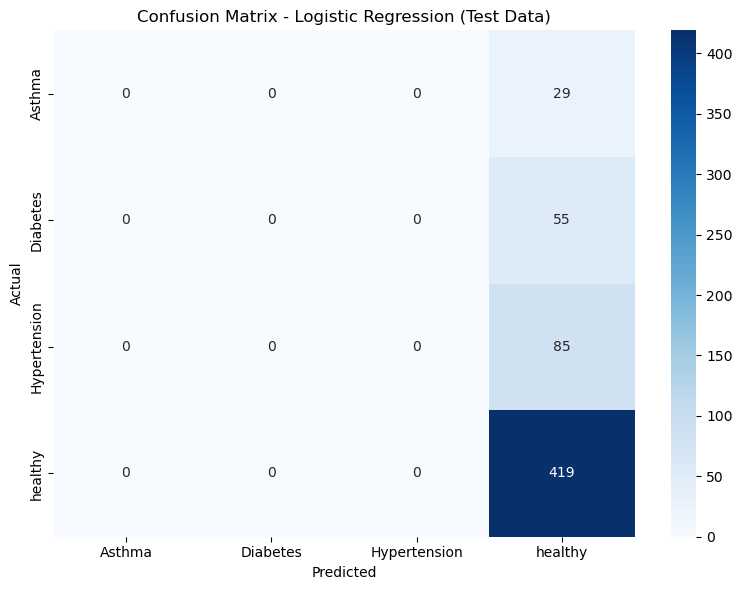

✅ Confusion matrix image saved as 'confusion_matrix_logistic_regression.png'


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (replace with your actual data loading)
# Dataset_Train = pd.read_csv('train.csv')
# Dataset_Test = pd.read_csv('test.csv')

# 1. Prepare features and target
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# 2. Identify column types
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# 4. Process data WITHOUT SMOTE
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 5. Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Use same encoder as training

# 6. Train Logistic Regression on original (imbalanced) data
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train_processed, y_train_encoded)

# 7. Predictions
y_train_pred = le.inverse_transform(log_reg.predict(X_train_processed))
y_test_pred = le.inverse_transform(log_reg.predict(X_test_processed))

# 8. Evaluation
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# 💾 Save the plot as a PNG file
plt.savefig("confusion_matrix_logistic_regression.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print("✅ Confusion matrix image saved as 'confusion_matrix_logistic_regression.png'")


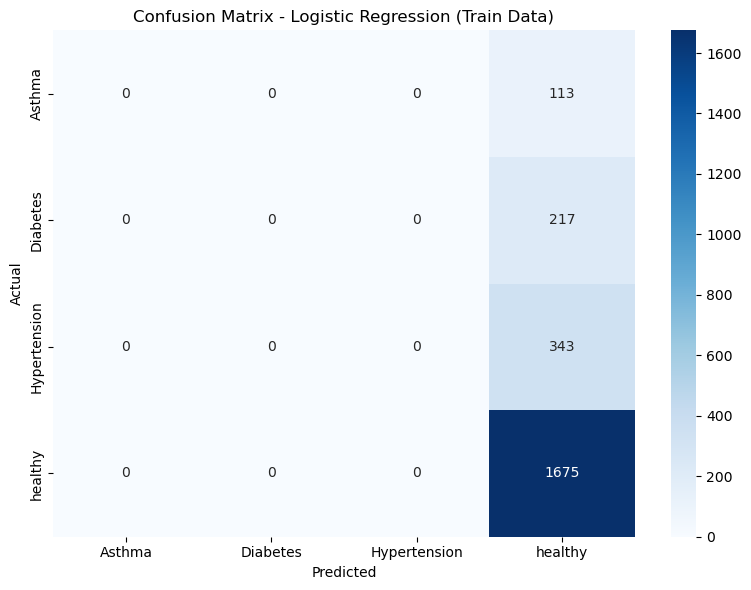

In [40]:
cm = confusion_matrix(y_train, y_train_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression (Train Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import recall_score, f1_score

# ================================================
# 🔍 Additional Evaluation Metrics
# ================================================

# Sensitivity (Recall)
train_sensitivity = recall_score(y_train, y_train_pred, average='weighted')
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("🔹 Additional Performance Metrics 🔹")
print(f"✅ Train Sensitivity (Recall): {train_sensitivity:.4f}")
print(f"✅ Test Sensitivity (Recall):  {test_sensitivity:.4f}")
print(f"✅ Train F1 Score:             {train_f1:.4f}")
print(f"✅ Test F1 Score:              {test_f1:.4f}")

🔹 Additional Performance Metrics 🔹
✅ Train Sensitivity (Recall): 0.7134
✅ Test Sensitivity (Recall):  0.7126
✅ Train F1 Score:             0.5940
✅ Test F1 Score:              0.5930


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_8244\280161454.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_importance.head(top_n), y=avg_importance.head(top_n).index, palette="coolwarm")


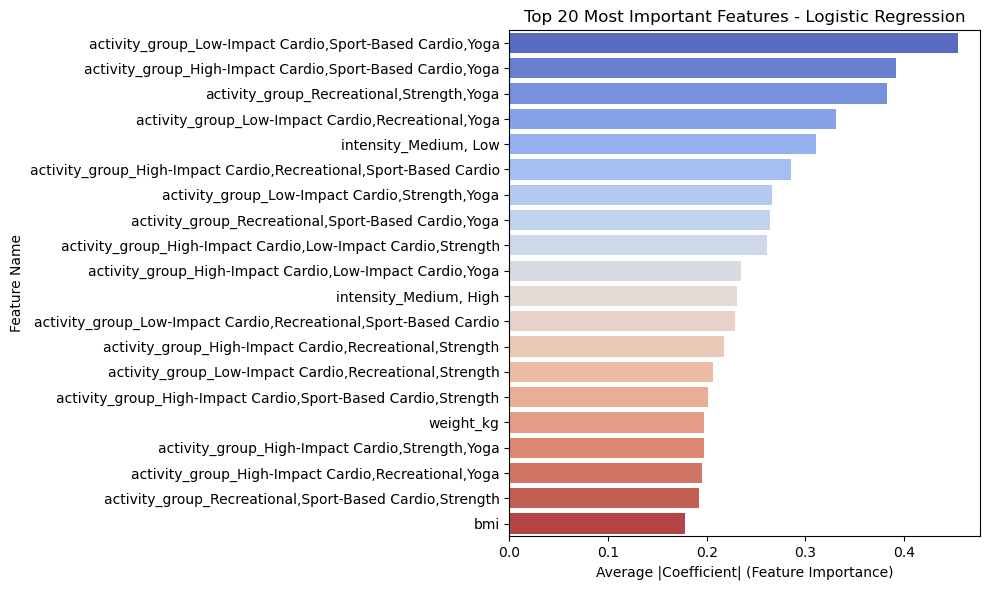


🔹 Top 10 Most Influential Features:
                                             Feature  Avg_Abs_Coefficient
0  activity_group_Low-Impact Cardio,Sport-Based C...             0.454098
1  activity_group_High-Impact Cardio,Sport-Based ...             0.391696
2          activity_group_Recreational,Strength,Yoga             0.382401
3  activity_group_Low-Impact Cardio,Recreational,...             0.331336
4                              intensity_Medium, Low             0.310459
5  activity_group_High-Impact Cardio,Recreational...             0.284856
6     activity_group_Low-Impact Cardio,Strength,Yoga             0.266251
7  activity_group_Recreational,Sport-Based Cardio...             0.263987
8  activity_group_High-Impact Cardio,Low-Impact C...             0.261059
9  activity_group_High-Impact Cardio,Low-Impact C...             0.234152


In [45]:
# ================================================
# 🔹 10. Feature Importance (Coefficient-based)
# ================================================

import numpy as np

# Get feature names from the preprocessor
num_features = numeric_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([num_features, cat_features])

# Get coefficients for the model
# For multinomial logistic regression, coef_ has shape [n_classes, n_features]
coef_df = pd.DataFrame(log_reg.coef_, columns=all_features, index=le.classes_)

# Compute average absolute importance across all classes
avg_importance = coef_df.abs().mean(axis=0).sort_values(ascending=False)

# Plot top 20 most important features
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_importance.head(top_n), y=avg_importance.head(top_n).index, palette="coolwarm")
plt.title("Top 20 Most Important Features - Logistic Regression")
plt.xlabel("Average |Coefficient| (Feature Importance)")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.savefig("IMPORTANCE_logistic_regression.png", dpi=300, bbox_inches='tight')

plt.show()

# Optional: print full table if you want
importance_table = avg_importance.reset_index()
importance_table.columns = ['Feature', 'Avg_Abs_Coefficient']
print("\n🔹 Top 10 Most Influential Features:")
print(importance_table.head(10))


## With SMOTE

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Before SMOTE: {3: 1711, 2: 347, 1: 226, 0: 116}
✅ After SMOTE: {3: 1711, 2: 1711, 1: 1711, 0: 1711}
✅ Train Accuracy: 0.4788135593220339
✅ Test Accuracy: 0.235

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.05      0.31      0.09        29
    Diabetes       0.11      0.32      0.16        57
Hypertension       0.17      0.26      0.21        87
     healthy       0.76      0.21      0.33       427

    accuracy                           0.23       600
   macro avg       0.27      0.28      0.20       600
weighted avg       0.58      0.23      0.29       600



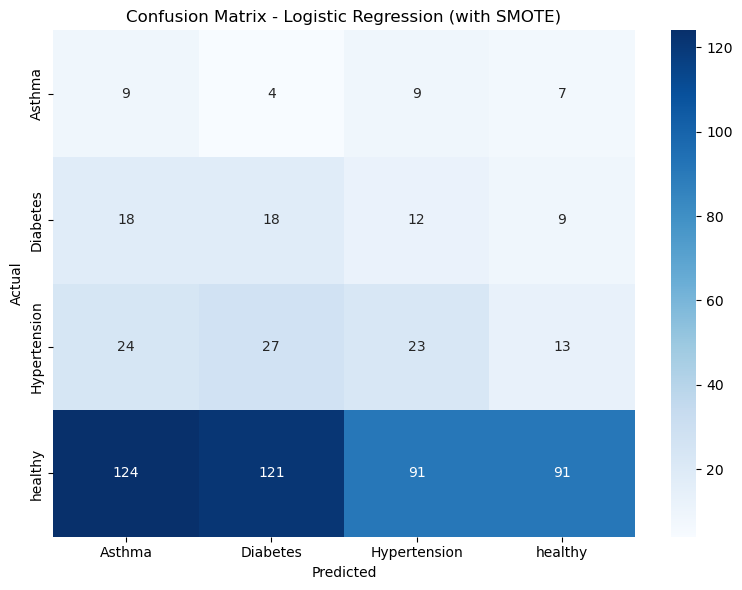

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1️⃣ Prepare Features and Target
# ==========================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ==========================================
# 2️⃣ Identify column types
# ==========================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ==========================================
# 3️⃣ Preprocessing (Scaling + OneHotEncoding)
# ==========================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Fit & transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ==========================================
# 4️⃣ Encode target variable
# ==========================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==========================================
# 5️⃣ Apply SMOTE (only on training data)
# ==========================================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_encoded)

print("✅ Before SMOTE:", dict(pd.Series(y_train_encoded).value_counts()))
print("✅ After SMOTE:", dict(pd.Series(y_train_resampled).value_counts()))

# ==========================================
# 6️⃣ Train Logistic Regression
# ==========================================
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train_resampled, y_train_resampled)

# ==========================================
# 7️⃣ Predictions
# ==========================================
y_train_pred = le.inverse_transform(log_reg.predict(X_train_resampled))
y_test_pred = le.inverse_transform(log_reg.predict(X_test_processed))

# ==========================================
# 8️⃣ Evaluation
# ==========================================
print("✅ Train Accuracy:", accuracy_score(le.inverse_transform(y_train_resampled), y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ==========================================
# 9️⃣ Confusion Matrix (Test Set)
# ==========================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
